In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import load_model
%matplotlib inline

## 1.load dataset by keras.load_model

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)

(60000, 28, 28)


## 2.Examine our dataset

In [25]:
print("x_train shape is ",x_train.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (60000, 28, 28)
x_test shape is  (10000, 28, 28)


### 2.1 look some of image in dataset

In [26]:
# you can use opencv lib to show image 
for i in range(5):
    random_number = np.random.randint(0,len(x_train))
    img = x_train[random_number]
    name = 'randomimage %d'%i
    cv2.imshow(name,img)
    cv2.waitKey(0)

cv2.destroyAllWindows()
    

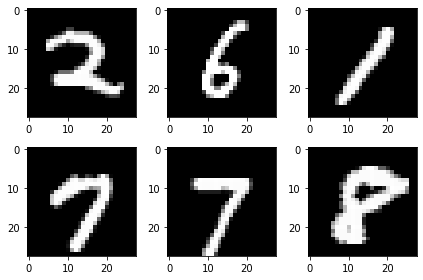

In [27]:
# or you can use matplotlib to show image 
rows = 2
cols = 3
fig, ax = plt.subplots(nrows=rows,ncols=cols)

for i in range(rows):
    for j in range(cols):
        random_number = np.random.randint(0,len(x_train))
        ax[i][j].imshow(x_train[random_number],cmap='gray')
        
plt.tight_layout()

## 3. Prepare our dataset

In [28]:
img_row = x_train[0].shape[0]
img_col = x_train[0].shape[1]

#adjust format to compatible with keras format
#format is  (number_of_sample,row,col,number_of_channel)
x_train = x_train.reshape(x_train.shape[0],img_row,img_col,1)
x_test = x_test.reshape(x_test.shape[0],img_row,img_col,1)

input_shape = (img_row,img_col,1)

#change type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize image
x_train /= 255
x_test /= 255

### 3.1 adjust label of dataset

In [29]:
# use one hot decode our label y
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_class = y_train.shape[1]
print('number of  class : ',y_train.shape[1])

number of  class :  10


## 4. Create our model

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_class,activation='softmax'))


model.compile(loss='categorical_crossentropy',
             optimizer=Adam(0.01),
             metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)              

## 5. Train model

In [31]:
batch_size = 64
epochs = 10

history = model.fit(x_train,y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test,y_test))

score = model.evaluate(x_test,y_test)
print('test loss: %f and test accuracy: %f'%(score[0],score[1]))

Epoch 1/10
938/938 [==============================] - 8s 9ms/step - loss: 0.2182 - accuracy: 0.9345 - val_loss: 0.0667 - val_accuracy: 0.9793
Epoch 2/10
938/938 [==============================] - 8s 8ms/step - loss: 0.1222 - accuracy: 0.9632 - val_loss: 0.0630 - val_accuracy: 0.9809
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1053 - accuracy: 0.9689 - val_loss: 0.0583 - val_accuracy: 0.9847
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0960 - accuracy: 0.9715 - val_loss: 0.0566 - val_accuracy: 0.9836
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0942 - accuracy: 0.9718 - val_loss: 0.0618 - val_accuracy: 0.9793
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0968 - accuracy: 0.9720 - val_loss: 0.0532 - val_accuracy: 0.9865
Epoch 7/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0894 - accuracy: 0.9738 - val_loss: 0.0583 - val_accuracy: 0.9846
Epoch 

## 6. look performance of model

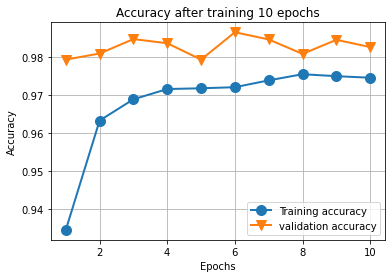

In [50]:
hist_dict = history.history

acc_values = hist_dict['accuracy']
val_acc_values = hist_dict['val_accuracy']

epochs = range(1,len(acc_values)+1)

plt.plot(epochs,acc_values,lw=2,marker='o',markersize=10,label='Training accuracy')
plt.plot(epochs,val_acc_values,lw=2,marker='v',markersize=10,label='validation accuracy')
plt.title('Accuracy after training 10 epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

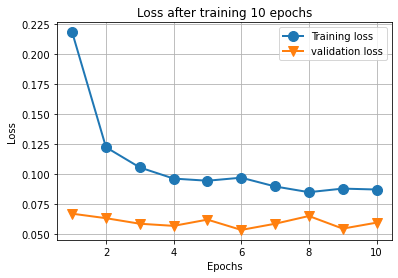

In [51]:
hist_dict = history.history

loss_values = hist_dict['loss']
val_loss_values = hist_dict['val_loss']

epochs = range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,lw=2,marker='o',markersize=10,label='Training loss')
plt.plot(epochs,val_loss_values,lw=2,marker='v',markersize=10,label='validation loss')
plt.title('Loss after training 10 epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

## 7. Save Model

In [52]:
model.save('HandwrittenRecognition_MNIST_simpleCNN.h5')

## 8. Test Model with test/unseen data

#### 8.1 you can use matplotlib or cv2 
#### first of all i show you with matplotlib

all predict number are  [6, 2, 0, 2, 8, 5, 9, 6, 3, 5]


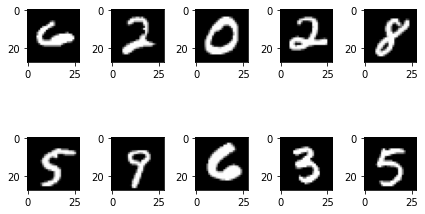

In [5]:
from keras.models import load_model

model = load_model('HandwrittenRecognition_MNIST_simpleCNN.h5')

rows = 2
cols = 5

fig,ax = plt.subplots(rows,cols)

predict_class = []

for i in range(rows):
        for j in range(cols):
            random_number = np.random.randint(0,len(x_test))
            ax[i][j].imshow(x_test[random_number],cmap='gray')
            input_img = x_test[random_number].reshape(1,28,28,1)
            predict_class.append(model.predict_classes(input_img,1,verbose=0)[0])
plt.tight_layout()
print('all predict number are ',predict_class)

#### second this cv2 library

In [6]:
def draw_test(name,pred,input_img):
    black = [0,0,0]
    
    row = input_img.shape[1]
    col = input_img.shape[2]
    image = input_img.reshape(row,col,1)
    
    image = cv2.resize(image,None,fx=4,fy=4,interpolation = cv2.INTER_CUBIC)
    row = image.shape[0]
    col = image.shape[1]
    
    expanded_image = cv2.copyMakeBorder(image,0,0,0,
                                        col*2,cv2.BORDER_CONSTANT,value=black)
    expanded_image = cv2.cvtColor(expanded_image,cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image,str(pred),(col+(col//2),int(row/1.2))
                ,cv2.FONT_HERSHEY_COMPLEX,4,(0,255,0),1)
    cv2.imshow(name,expanded_image)
    

In [7]:
for i in range(10):
    random_number = np.random.randint(0,len(x_test))
    input_img = x_test[random_number]
    
    input_img = x_test[random_number].reshape(1,28,28,1)
    
    predict_class = model.predict_classes(input_img,1,verbose=0)[0]
    draw_test('prediction',predict_class,input_img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()
    

## 9. Plot structure of model (if you want)

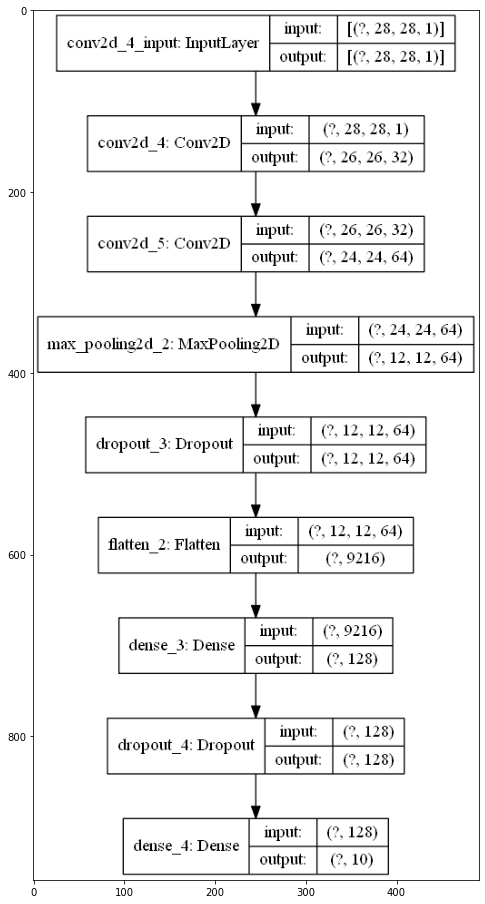

In [9]:
from keras.utils import plot_model
import matplotlib.image as mpimg

plot_model(model,to_file='model_plot.png',
          show_shapes=True,
          show_layer_names=True)

fig = plt.figure(figsize=(32,16))
model_img = mpimg.imread('model_plot.png')
plt.imshow(model_img)